# Water Potability Prediction

This time, the goal is to develop a GridSearch process to search for the best hyperparameters of different models within a range of values defined by ourselves. We're going to apply and understand the following models:

- Decision Trees
- Random Forests
- AdaBoost
- XGBoost
- Bagging

It is strongly recommended to read the documentation of each model.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Read CSV and drop NAs

In [29]:
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

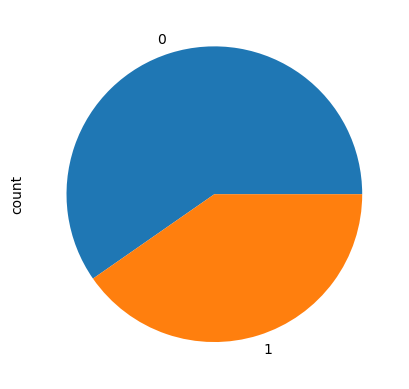

In [30]:
df['Potability'].value_counts().plot(kind='pie')
plt.show()

### Handling Imbalanced Data: Resampling

We will use the `resample` function from SciKit-Learn to resample some samples from class '1'.

In [31]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

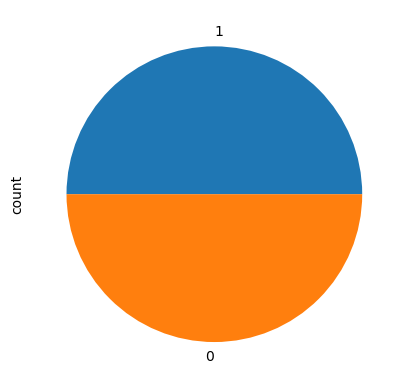

In [32]:
df['Potability'].value_counts().plot(kind='pie')
plt.show()

In [33]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

## Part 1: Model Testing and GridSearch/RandomizedSearch

Next, we will perform a procedure to search for the best model and its corresponding hyperparameters. These procedures are known as GridSearch/RandomizedSearch. You can find more information at the following links:

- [GridSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)
- [Medium Article: GridSearch & RandomizedSearch](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Split into training and test

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Utilice la función train_test_split #

## Part 1A

### Definition of GridSearch/RandomizedSearch Parameters

Based on the documentation of the functions, define the following parameters for the cases:

- GridSearch:
    - Decision Tree (GridSearch):
        - 'criterion': 'gini' and 'entropy'
        - 'max_depth': vector of integer values between 1 and 50
        - 'min_samples_leaf': 10 values selected by you between 1 and 100
    
    - Random Forest (GridSearch):
        - 'n_estimators': 4 values selected by you between 100 and 500
        - 'min_samples_leaf': 3 values selected by you between 2 and 30
        
    - AdaBoost (GridSearch):
        - 'n_estimators': 6 values selected by you between 50 and 600
        - 'learning_rate': 5 values of learning rates between 0 and 1
        
    - XGBoost (RandomizedSearch):
        - 'n_estimators': 8 values selected by you between 50 and 600
        - 'learning_rate': 5 values of learning rates between 0 and 1


In [36]:
lr = LogisticRegression(random_state=42)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Decision Tree
para_dt = {'criterion': ["gini", "entropy"], 'max_depth': np.arange(1, 51), 'min_samples_leaf': [1, 45, 65, 8, 23, 89, 95, 32, 3, 12]} # Dictionary with GridSearch/RandomizedSearch parameters # }
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)

# Random Forest
# n_estimators: number of trees in the forest.
params_rf = {'n_estimators': [394, 420, 210, 169], 'min_samples_leaf': [3, 20, 11]} # Dictionary with GridSearch/RandomizedSearch parameters # }
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

# AdaBoost
params_ada = {'n_estimators': [69, 420, 599, 170, 127, 116], 'learning_rate': [0.2, 0.42, 0.69, 0.08, 0.12]} # Dictionary with GridSearch/RandomizedSearch parameters # }
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

# XGBoost
params_xgb = {'n_estimators': [99, 57, 355, 367, 595, 271, 193, 469], 'learning_rate': [0.47, 0.10, 0.07, 0.88, 0.61]} # Dictionary with GridSearch/RandomizedSearch parameters # }
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


### Hyperparameter Search

Next, the GridSearch process must be performed. This operation may take some time.

In [37]:
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.47, 0.1, 0.07, 0.88,
                                                          0.61],
                                        'n_estimators': [99, 57, 355, 367, 595,
                                                         271, 193, 469]})

In [38]:
print("Best parameters Decision Tree:", grid_dt.best_params_)
print("Best parameters Random Forest:", grid_rf.best_params_)
print("Best parameters AdaBoost:", grid_ada.best_params_)
print("Best parameters XGBoost:", rs_xgb.best_params_)

Best parameters Decision Tree: {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 1}
Best parameters Random Forest: {'min_samples_leaf': 3, 'n_estimators': 394}
Best parameters AdaBoost: {'learning_rate': 0.69, 'n_estimators': 599}
Best parameters XGBoost: {'n_estimators': 595, 'learning_rate': 0.07}


In [39]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 1}

## Part 1B

### Boosting & Bagging

For this case, we use 100 Decision Tree classifiers with the best parameters obtained from the previous GridSearch.


In [40]:
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=39, min_samples_leaf=1)

# Boosting & Bagging
bagging = BaggingClassifier(base_estimator=dt2, n_estimators=100)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=39),
                  n_estimators=100)

### Evaluation Metrics

Below you will see a summary with the accuracies of each model and then their graphical representation.


In [41]:
classifiers = [('Logistic Regression', lr),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('Bagging', bagging), ('XGBoost', xgb)]

In [42]:
from sklearn.metrics import accuracy_score

classifier_names = []
classifier_acc = []
for classifier_name, classifier in classifiers:
 
    # Fit for training data
    classifier.fit(X_train, y_train)    

    # Predictions
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Classifier evaluation
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_names.append(classifier_name)
    classifier_acc.append(accuracy)


Logistic Regression : 0.46
Decision Tree : 0.77
Random Forest : 0.82
AdaBoost : 0.60
Bagging : 0.80
XGBoost : 0.78


# Preliminary Results

<BarContainer object of 6 artists>

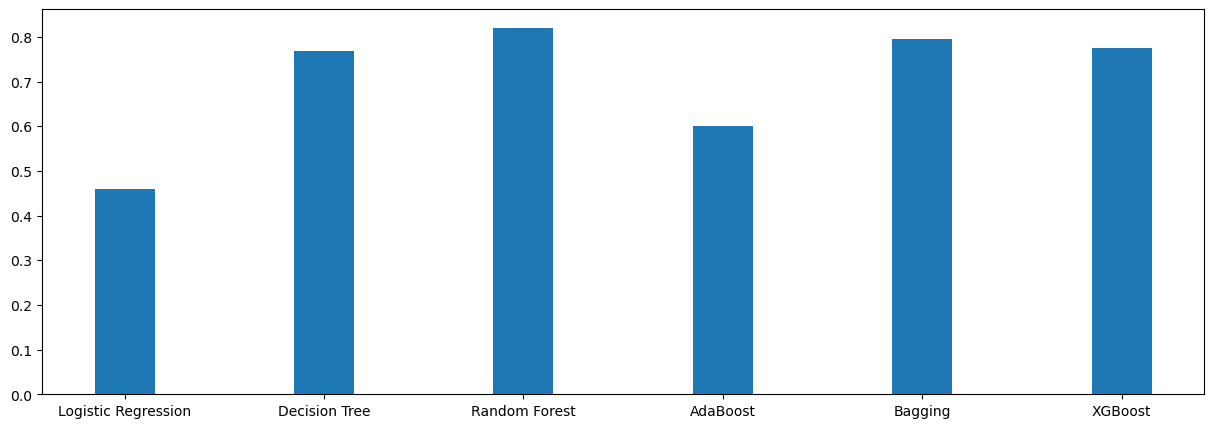

In [43]:
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_acc, width=0.3)

## Part 2

### Results Analysis

Now we'll use the `classification_report` function to determine which classifier best fits the desired results, taking into account the context of the problem and the simplicity of each model.

### Random Forest


In [44]:
from sklearn.metrics import classification_report

y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       228
           1       0.85      0.80      0.82       252

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



### Decision Tree

In [45]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       228
           1       0.77      0.79      0.78       252

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480



### XGBoost

In [46]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       228
           1       0.79      0.78      0.78       252

    accuracy                           0.78       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.78      0.78      0.78       480



### Decision Tree Bagging

In [47]:
y_pred_bagging = bagging.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       228
           1       0.81      0.81      0.81       252

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



## Conclusions

- It is clear that among all the models, the decision tree model is the least complex model, and this is reflected in its accuracy score, which was the lowest for all the models tested.
- It was found that the decision tree bagging classifier had an accuracy score of 0.79, while the Random Forest classifier had an accuracy score of 0.81. It is normal to find that they have similar scores because both classifiers are practically the same with the difference that bagging decision trees takes into account all the features of the classes for classification, while Random Forest only takes into account a subset of the features.
- XGBoost is based on decision trees and uses a technique called gradient boosting for classification. It can be said that this classifier obtained a lower accuracy score compared to Random Forest or Bagging decision trees because the classifier was built using RandomizedSearch, which does not consider all hyperparameters to find the optimal ones, unlike the GridSearch method, which does search among all hyperparameters to find the optimal ones.
- In GridSearch, all possible combinations of the parameters of interest are tested to find the best ones. Meanwhile, in RandomizedSearch, only some of them are used. The latter is very useful when there are a very large number of parameters and the training time is quite high. However, when this is not the case, it is always better to use GridSearch.
- In the context of the problem, there is a higher cost of having false positives since if water is identified as potable when it is not and is used for feeding or health purposes, it can be very dangerous to people's health. Therefore, we are interested in choosing a classifier that incurs a lower percentage of false positives. For this, the classifier whose precision measure is the highest will be prioritized, as a higher measure of search effectiveness indicates a lower rate of false positives. Taking the above into account, the Random Forest classifier is chosen as the best classifier because besides having the highest accuracy score among the classifiers tested, it also had the highest average precision of all, demonstrating its low false positive rate.
- A disadvantage of choosing a very complex classifier is the fact that it has the highest computational cost associated. For this reason, simpler methods can be used that may sacrifice precision and accuracy in classification.
